In [9]:
import albumentations as A
import os
import cv2
from matplotlib import pyplot as plt
import json
import numpy as np

# train_imgs_dir = '../../cityscapes_data/leftImg8bit/my_train/'
# val_imgs_dir = '../../cityscapes_data/leftImg8bit/my_val/'

# train_imgs_files = os.listdir(train_imgs_dir)
# val_imgs_files = os.listdir(val_imgs_dir)

In [3]:
with open('dirs.json') as f:
    dirs = json.load(f)
dirs

{'train_imgs_dir': '../../cityscapes_data/leftImg8bit/my_train/',
 'val_imgs_dir': '../../cityscapes_data/leftImg8bit/my_val/',
 'train_mask_dir': '../../cityscapes_data/gtCoarse/my_train/',
 'val_mask_dir': '../../cityscapes_data/gtCoarse/my_val/'}

In [4]:
train_imgs = os.listdir(dirs['train_imgs_dir'])
train_mask = os.listdir(dirs['train_mask_dir'])

train_imgs.sort(), train_mask.sort()

(None, None)

In [26]:
print(train_imgs[10],#[-16:], 
      train_mask[10])#[-27:]

aachen_000010_000019_leftImg8bit.png aachen_000010_000019_gtCoarse_labelTrainIds.png


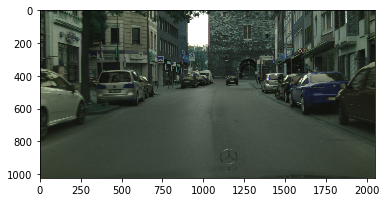

In [29]:
im = cv2.imread(os.path.join(dirs['train_imgs_dir'], train_imgs[50]))
# im_mask = cv2.imread(os.path.join(dirs['train_mask_dir'], train_mask[50]))
plt.imshow(im, interpolation='nearest')
# plt.imshow(im_mask, interpolation='nearest')
plt.show()

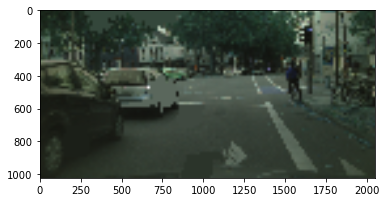

In [7]:
transform = A.Compose([
    A.Superpixels( p=1)
])
transformed = transform(image=im)
plt.imshow(transformed['image'], interpolation='nearest')
plt.show()

In [8]:
type1 = [A.Blur(blur_limit = 50, p = 0.15), 
         A.GaussianBlur(blur_limit=(15, 51), p=0.15), 
         A.GlassBlur(sigma=1, max_delta=7, iterations=1, p=0.15), 
         A.HorizontalFlip(p=0.2), 
         A.MedianBlur(blur_limit=51, p=0.15), 
         A.MotionBlur(blur_limit = 47, p=0.15)]

type2 = [A.CLAHE(clip_limit = 10, p = 0.2), 
         A.Emboss(alpha=(0.5, 0.9), strength=(0.5, 0.9), p = 0.2), 
         A.Equalize(p = 0.2), 
         A.InvertImg(p = 0.01), 
         A.MultiplicativeNoise(multiplier=(1, 3), p=0.2),
         A.Solarize(p=0.2)]

type3 = [A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5, p = 0.2), 
         A.HueSaturationValue(hue_shift_limit=50, sat_shift_limit=50, val_shift_limit=50, p=0.2), 
         A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.2), 
         A.RandomToneCurve(scale = 0.3, p=0.2),
         A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.2),
         A.ToGray(p=0.2), 
         A.ToSepia(p=0.2)]

type4 = [A.GaussNoise(var_limit=(45.0, 95.0), p = 0.2), 
         A.ISONoise(color_shift=(0.1, 0.5), intensity=(0.3, 0.7), p = 0.2),
         A.Sharpen(alpha=(0.4, 0.8), lightness=(0.5, 1.0), p=0.2)]

type5 = [A.GridDistortion(num_steps=1, distort_limit=1, p=0.1), 
         A.OpticalDistortion(distort_limit=0.7, shift_limit=1, p=0.1), 
         A.RandomGridShuffle(grid=(3, 3), p=0.1),
         A.Superpixels(p=0.05)]

type6 = [A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.5, alpha_coef=0.08, p=0.1), 
         A.RandomRain(p=0.1), 
         A.RandomShadow(p=0.1), 
         A.RandomSnow(p=0.1), 
         A.RandomSunFlare(p=0.1)]

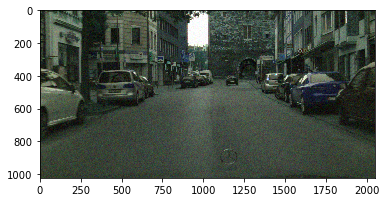

In [35]:
transforms = A.Compose([np.random.choice(type1), 
                        np.random.choice(type2), 
                        np.random.choice(type3),
                        np.random.choice(type4), 
                        np.random.choice(type5), 
                        np.random.choice(type6)])
transformed = transforms(image=im)
plt.imshow(transformed['image'], interpolation='nearest')
plt.show()